# Sentinel-1 Monthly Mosaic <img align="right" src="../Supplementary_data/DE_Africa_Logo_Stacked_RGB_small.jpg">


* **Products used:** 
[s1_monthly_mosaic](https://explorer.digitalearth.africa/products/s1_monthly_mosaic)

## Background

Synthetic Aperture Radar (SAR) sensor has the advantage of operating at wavelengths not impeded by cloud cover and can acquire data over a site during the day or night. The [Sentinel-1](https://sentinel.esa.int/web/sentinel/missions/sentinel-1)  mission, part of the Copernicus joint initiative by the European Commission (EC) and the European Space Agency (ESA), provides reliable and repeated wide-area monitoring using its SAR instrument.

The Sentinel-1 monthly mosaics are generated from Radiometric Terrain Corrected (RTC) backscatter data, with variations from changing observation geometries mitigated. RTC images acquired within a calendar month are combined using a multitemporal compositing algorithm. This algorithm calculates a weighted average of valid pixels, assigning higher weights to pixels with higher local resolution (e.g., slopes facing away from the sensor). This local resolution weighting approach minimizes noise and improves spatial homogeneity in the composites. 

More information on how the product is generated can be found in the [Copernicus Data Space Ecosystem Documentation](https://documentation.dataspace.copernicus.eu/Data/SentinelMissions/Sentinel1.html#sentinel-1-level-3-monthly-mosaics)


DE Africa provides access to Sentinel-1 monthly mosaics generated from Interferometric Wide (IW) acquisition mode. The mosaics are organized in a UTM grid with tiles measuring 100 x 100 km and have a spatial resolution of 20 meters.

## Description

In this notebook we will load Sentinel-1 Monthly Mosaics.

Topics covered include:
1. Inspecting the Sentinel-1 monthly mosaics product and measurements available in the datacube
2. Using the `dc.load()` function to load in Sentinel-1 monthly mosaics
3. Visualising monthly mosaics
4. Comparing monthly mosaics with monthly NDVI and individual Sentinel-1 scenes
***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages

In [1]:
%matplotlib inline
import datacube
import matplotlib.pyplot as plt
from deafrica_tools.plotting import rgb 
from deafrica_tools.plotting import display_map
from deafrica_tools.datahandling import mostcommon_crs
from deafrica_tools.bandindices import dualpol_indices

### Connect to the datacube

In [2]:
dc = datacube.Datacube(app="Sentinel_1_mosaic")

## Available products and measurements

### List products

We can use datacube's `list_products` functionality to inspect DE Africa's Sentinel-1 products that are available in the datacube. The table below shows the product names that we will use to load the data, a brief description of the data, and the satellite instrument that acquired the data.

In [3]:
dc.list_products().loc[dc.list_products()['name'].str.contains('s1')]

name  \
name                                   
s1_monthly_mosaic  s1_monthly_mosaic   
s1_rtc                        s1_rtc   

                                                         description  \
name                                                                   
s1_monthly_mosaic  Monthly Sentinel-1 mosaics of weighted terrain...   
s1_rtc                Sentinel 1 Gamma0 normalised radar backscatter   

                     license default_crs default_resolution  
name                                                         
s1_monthly_mosaic       None        None               None  
s1_rtc             CC-BY-4.0   EPSG:4326  (-0.0002, 0.0002)

In [4]:
product = "s1_monthly_mosaic"

### List measurements

We can further inspect the data available for each SAR product using datacube's `list_measurements` functionality. The table below lists each of the measurements available in the data.

In [5]:
measurements = dc.list_measurements()
measurements.loc[product]

name    dtype units  nodata aliases flags_definition  add_offset  \
measurement                                                                    
VV            VV  float32     1     NaN    [vv]              NaN         NaN   
VH            VH  float32     1     NaN    [vh]              NaN         NaN   

             scale_factor  
measurement                
VV                    NaN  
VH                    NaN

The Sentinel-1 Monthly Mosaic product has two measurements:

* Backscatter in `VV` polarisation, representing weighted average of valid normalized `VV` backscatter values measured over the month. 
* Backscatter in `VH` polarisation, representing weighted average of valid normalized `VH` backscatter values measured over the month. 

The two-letter band names indicate the polarization of the light transmitted and received by the satellite. *VV* refers to the satellite sending out vertically-polarised light and receiving vertically-polarised light back, whereas *VH* refers to the satellite sending out vertically-polarised light and receiving horizontally-polarised light back.

## Load Sentinel-1 Monthly Mosaics using `dc.load()`

Now that we know what products and measurements are available for the product, we can load data from the datacube using `dc.load`.

In the example below, we will load Sentinel-1 mosaic in an area between Lagos and Abeokuta, Southwestern Nigeria, from April 2023 to March 2024. 

We will load data from two polarisation bands,`VV` and `VH`. Since the data is provided in UTM grid, we will use the most common projection for the area to load data.

> Note: For a more general discussion of how to load data using the datacube, refer to the [Introduction to loading data](../Beginners_guide/03_Loading_data.ipynb) notebook.

In [6]:
# Define the area of interest
latitude = 6.86
longitude = 3.33

buffer = 0.02
time = ('2023-04', '2024-03')

bands = ['vv','vh']

In [7]:
#add spatio-temporal extent to the query
query = {
    'x': (longitude-buffer, longitude+buffer),
    'y': (latitude+buffer, latitude-buffer),
    'time':time,
}

### Visualise the selected area 

In [8]:
display_map(x=(longitude-buffer, longitude+buffer), y=(latitude+buffer, latitude-buffer))

In [9]:
output_crs = mostcommon_crs(dc=dc, product=product, query=query)
print(output_crs)

epsg:32631


In [10]:
# loading the data
ds_monthly = dc.load(
    product=product,
    measurements=bands,
    output_crs=output_crs,
    resolution=(-20, 20),
    **query
)

print(ds_monthly)

<xarray.Dataset> Size: 4MB
Dimensions:      (time: 10, y: 222, x: 222)
Coordinates:
  * time         (time) datetime64[ns] 80B 2023-05-16T11:59:59.500000 ... 202...
  * y            (y) float64 2kB 7.605e+05 7.605e+05 ... 7.561e+05 7.561e+05
  * x            (x) float64 2kB 5.342e+05 5.343e+05 ... 5.386e+05 5.387e+05
    spatial_ref  int32 4B 32631
Data variables:
    vv           (time, y, x) float32 2MB 0.19 0.2449 0.2511 ... 0.1455 0.1854
    vh           (time, y, x) float32 2MB 0.0488 0.05977 ... 0.03802 0.0386
Attributes:
    crs:           epsg:32631
    grid_mapping:  spatial_ref


## Visualise Sentinel-1 Mosaic 

In [11]:
# adding a ratio band
ds_monthly['vh_over_vv'] = ds_monthly.vh/ds_monthly.vv

In [12]:
data_min = ds_monthly.quantile(0.02)
data_max = ds_monthly.quantile(0.98)

In [13]:
scaled = (ds_monthly - data_min)/(data_max - data_min)

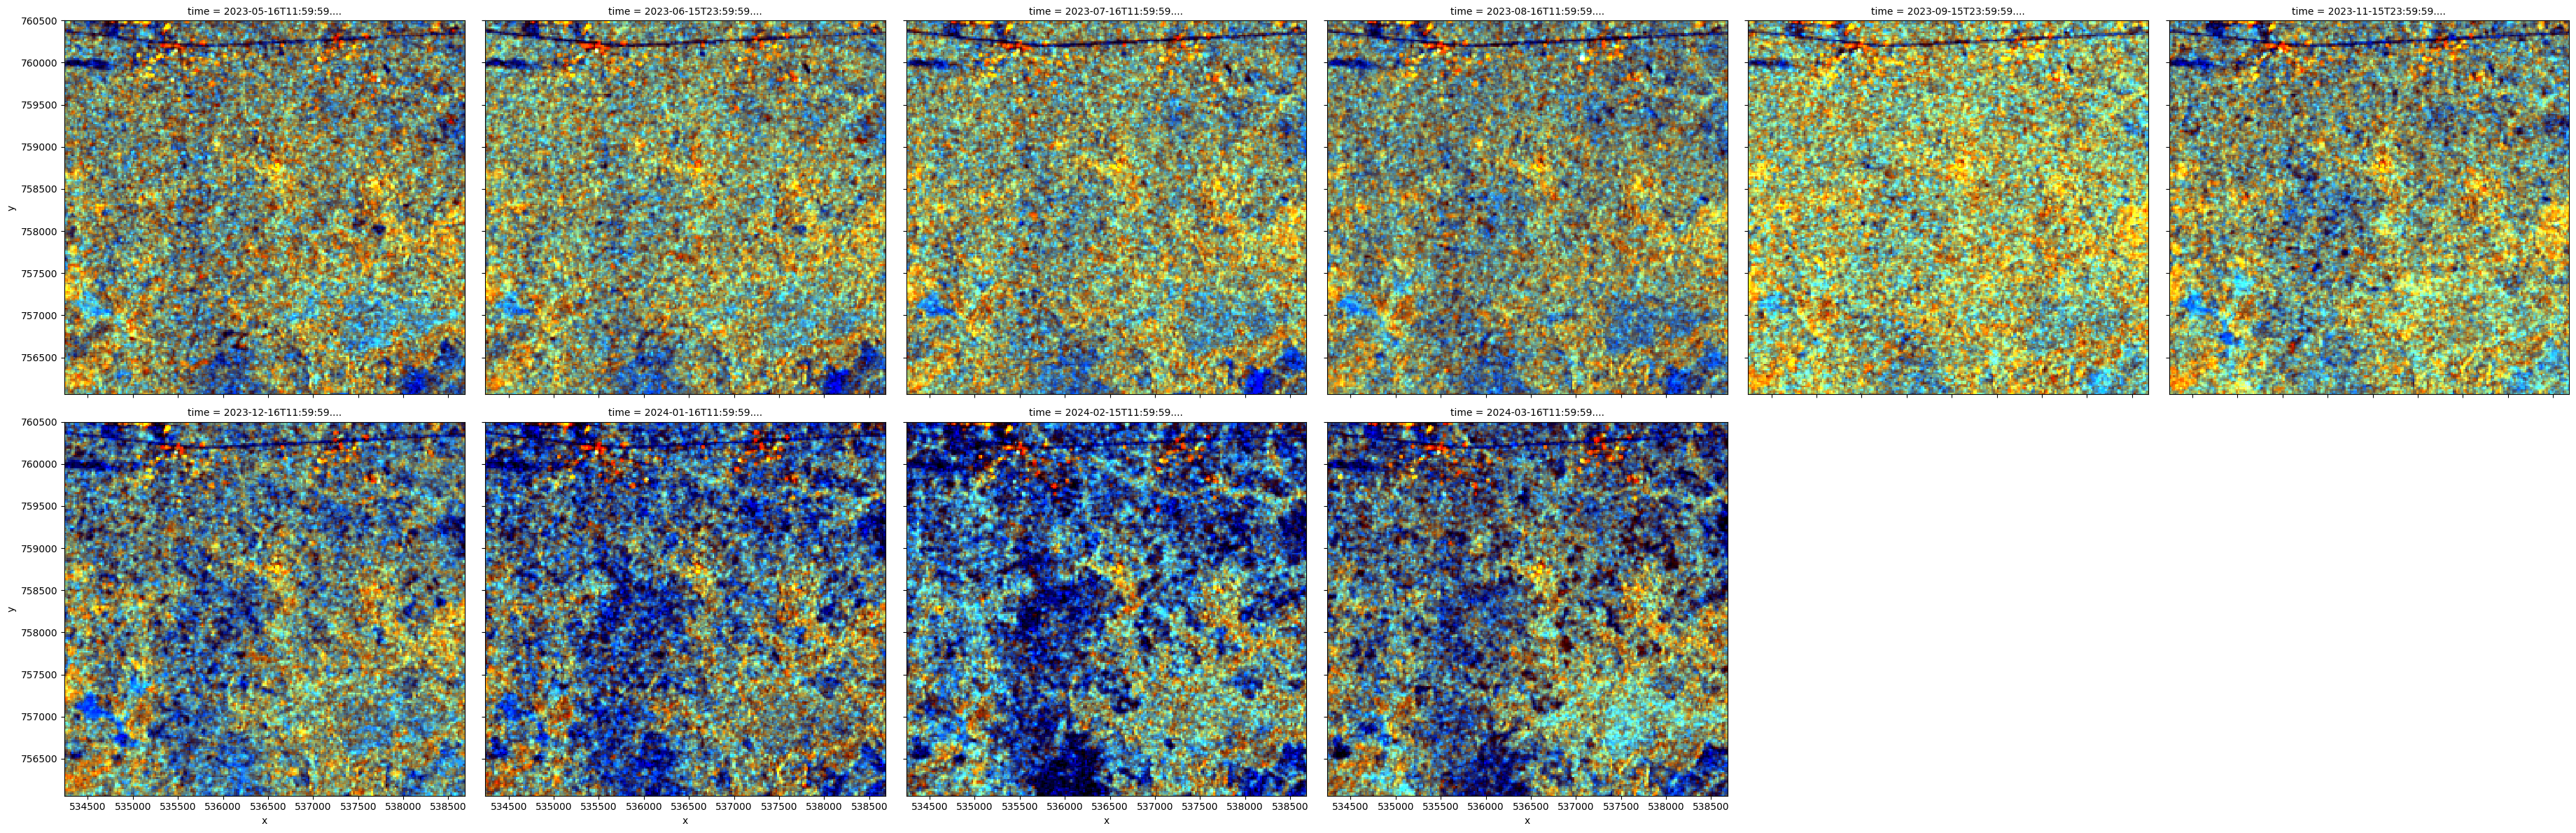

In [14]:
rgb(scaled, bands=['vv','vh','vh_over_vv'], col='time', col_wrap=6)

## Advantages of using the monthly mosaics

The regular monthly spacing enables easy time series analysis, either alone or combined with other datasets.

> Over cloudy regions like the example area in Southwestern Nigeria, radar mosaics provide a reliable means of tracking changes throughout the year, particularly during the rainy season when crops are actively growing.

Below, we compare radar mosaics to monthly NDVI measurements. In much of this region, NDVI data is either unavailable in certain months (e.g., July, September, November) due to persistent cloud cover or affected by residual clouds that were not correctly filtered out (e.g., June, August). This leads to an inaccurate representation of the growing trends, as shown in the plot below.

In contrast, radar data remains unaffected by cloud cover and successfully tracks crop development throughout the entire year, providing a more consistent and reliable dataset for monitoring agricultural changes.

> In areas less affected by clouds, radar can provide complementary information to optical data, enhancing the overall monitoring capabilities.

In [15]:
# load monthly mean NDVI from the NDVI anomaly product

ndvi_anom = dc.load(
    product="ndvi_anomaly",
    measurements=["ndvi_mean"],
    **query,
)

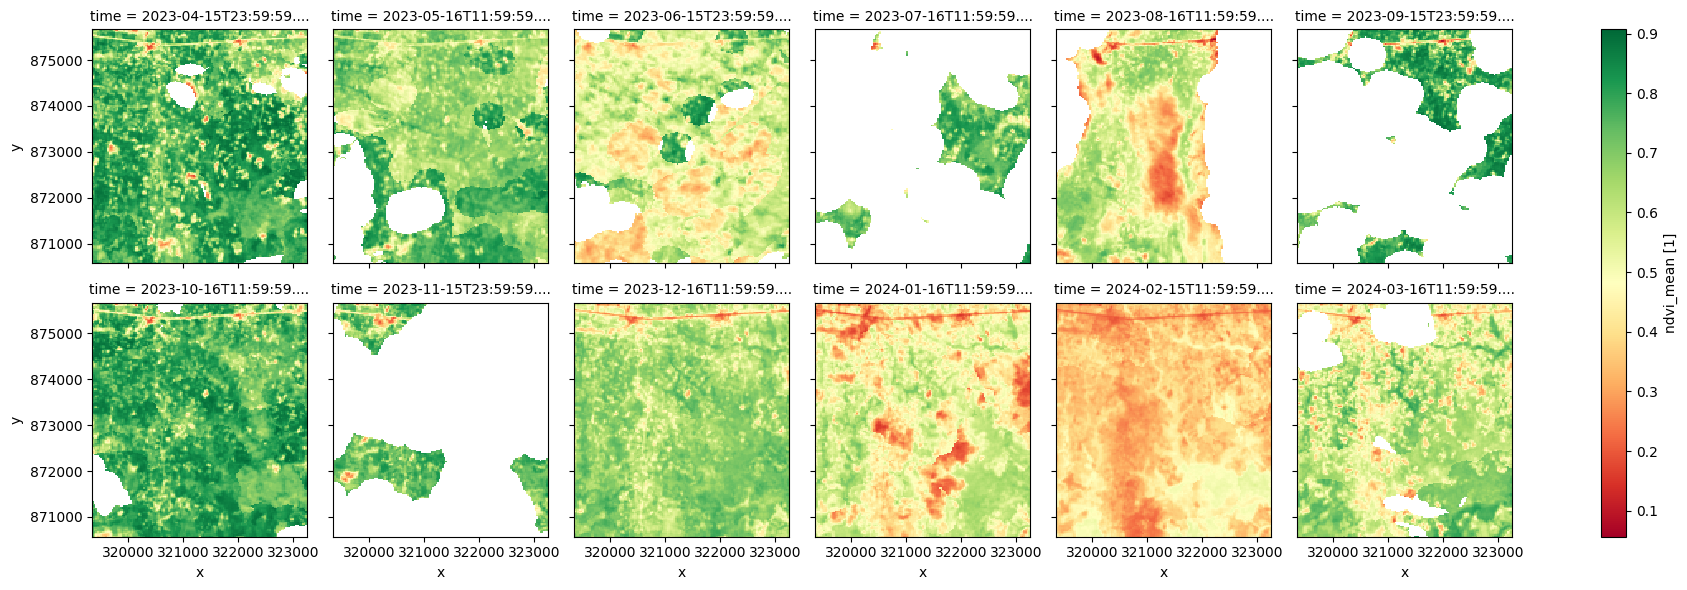

In [16]:
# visualise monthly NDVI

ndvi_anom.ndvi_mean.plot.imshow(col='time', col_wrap=6, cmap="RdYlGn");

In [17]:
# Calculate the chosen radar vegetation index and add it to the loaded data set

ds_monthly = dualpol_indices(ds_monthly, index='RVI')

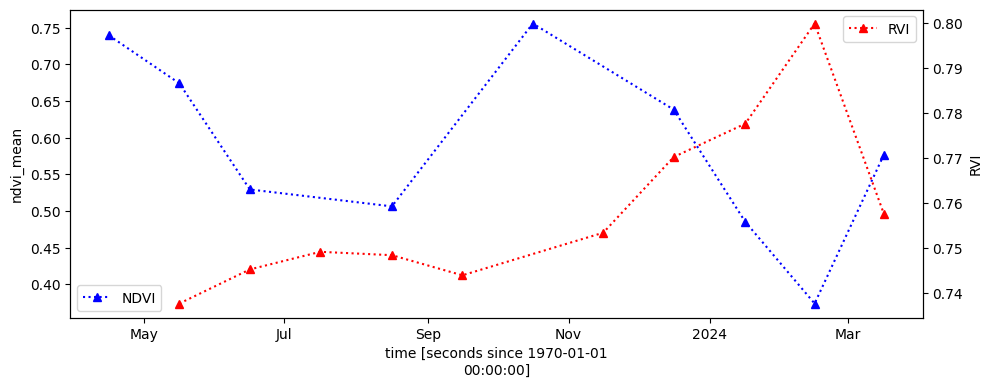

In [18]:
# Compare monthly NDVI trend and radar measured vegetation trend

fig, ax1 = plt.subplots(figsize=(11,4))
ndvi_anom.ndvi_mean.mean(['x','y']).isel(time=ndvi_anom.ndvi_mean.isnull().mean(['x','y'])<0.5).plot.line('b:^', ax=ax1, label='NDVI');
ax1.set_title('');
plt.legend(loc='lower left');

# Create a second y-axis
ax2 = ax1.twinx()
ds_monthly.RVI.mean(['x', 'y']).plot.line('r:^', ax=ax2, label='RVI');
ax2.set_title('');

plt.legend(loc='upper right');

The NDVI trend above is unreliable due to missing data and the presence of residual clouds, particularly during the rainy season.

### Comparison to individual Sentinel-1 scenes

Monthly mosaics offer reduced noise (as shown below) and improved spatial homogeneity compared to individual Sentinel-1 scenes.

In [19]:
# reduce the time window to one month for this demonstration
query['time'] = ('2023-04')

# loading individual Sentinel-1 scenes
ds_S1 = dc.load(product='s1_rtc',
                measurements=bands + ['mask', 'area'],
                group_by="solar_day",
                output_crs = ds_monthly.attrs['crs'], resolution = (-20,20),
                **query)

print(ds_S1)

<xarray.Dataset> Size: 3MB
Dimensions:      (time: 5, y: 222, x: 222)
Coordinates:
  * time         (time) datetime64[ns] 40B 2023-04-04T05:30:28.075105 ... 202...
  * y            (y) float64 2kB 7.605e+05 7.605e+05 ... 7.561e+05 7.561e+05
  * x            (x) float64 2kB 5.342e+05 5.343e+05 ... 5.386e+05 5.387e+05
    spatial_ref  int32 4B 32631
Data variables:
    vv           (time, y, x) float32 986kB 0.1881 0.1881 ... 0.3029 0.3029
    vh           (time, y, x) float32 986kB 0.02524 0.02524 ... 0.03364 0.03364
    mask         (time, y, x) uint8 246kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    area         (time, y, x) float32 986kB 1.044 1.044 1.004 ... 1.017 1.017
Attributes:
    crs:           epsg:32631
    grid_mapping:  spatial_ref


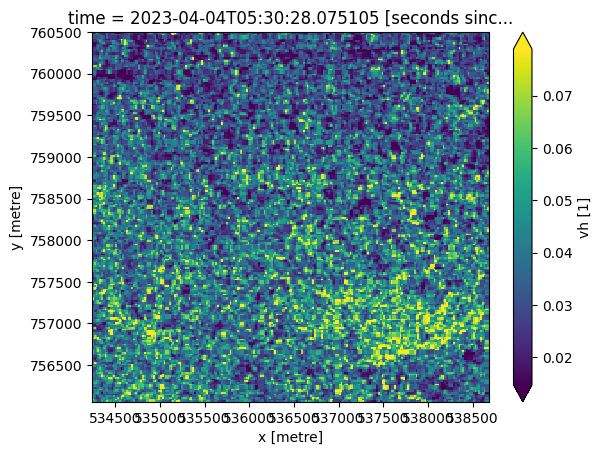

In [20]:
# Plot individual Sentinel-1 observation
ds_S1.vh.isel(time=0).plot.imshow(robust=True)

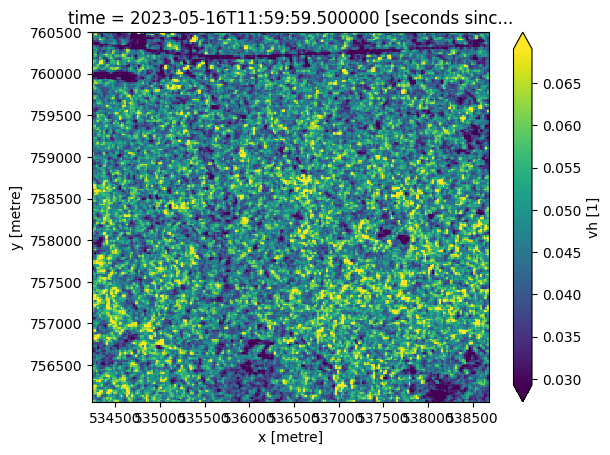

In [21]:
# monthly mosaic
ds_monthly.isel(time=0).vh.plot.imshow(robust=True)

With reduced noise, small features are more visible in the monthly mosaic.

## Other considerations

Combining acquisitions from different orbit directions and look angles helps reduce radar shadow effects in mosaics. However, in steep terrain, some areas may consistently fall into radar shadow, making reliable backscatter measurements impossible. These regions are marked as NaN in the mosaic.

When high temporal resolution is crucial, individual [Sentinel-1](Sentinel_1.ipynb) scenes offer greater flexibility for analysis.

Additionally, a local resolution weighting approach can be applied to combine Sentinel-1 scenes from different time periods. For slow-changing landscapes, a time window longer than a month can be used to futher reduce noise.

### Generating weighted mosaic

In [22]:
# apply local resolution weighting to generate a mosaic

weight = 1 / ds_S1.area.where(ds_S1.mask==1)
ds_S1_weighted = (ds_S1[['vv', 'vh']].where(ds_S1.mask==1)*weight/weight.sum(dim='time')).sum(dim='time')

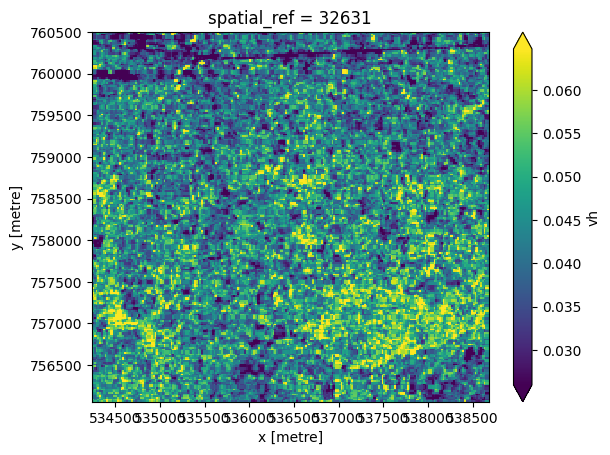

In [23]:
ds_S1_weighted.vh.plot.imshow(robust=True);

The mosaic generated above differs slightly from the monthly mosaic product due to variations in projection and resampling methods used during processing.

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:** 

In [24]:
print(datacube.__version__)

1.8.20


**Last Tested:**

In [25]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2025-03-26'